# Lecture 4 Data management: Part I
- Control structure
- Missing value
- Dates
- Useful functions
- How to write our own functions

## 4.1 Control structure
See ?Control

Avoid using loops in R. I taught a workshop on efficient coding and computing and explaied why. Here is the link: https://github.com/ly129/MiCM
### 4.1.1 For loop

In [1]:
df <- data.frame(names = c("Lucy", "John", "Mark", "Candy"),
                 score = c(67, 56, 87, 91))
df

names,score
<fct>,<dbl>
Lucy,67
John,56
Mark,87
Candy,91


In [2]:
for (i in 1:4) {
    df$curved[i] <- sqrt(df$score[i])*10
}
df

names,score,curved
<fct>,<dbl>,<dbl>
Lucy,67,81.85353
John,56,74.83315
Mark,87,93.27379
Candy,91,95.39392


In [3]:
x <- NULL
for (i in 1:5) {
    x[i] = 2*i
}
x

[1]  2  4  6  8 10

### 4.1.2 While loop
Two useless operators in R that I found useful for teaching: modulus and integer division.

In [4]:
9 %% 2   # 9 mod 2
9 %/% 2

[1] 1

[1] 4

#### Can we write a while loop to do the two operations at the same time?

In [5]:
# y %% x
i <- 0
y <- 9
x <- 2
while (y>=x) {
    y <- y - x
    i <- i + 1
}
y   # modulus
i   # integer division
# why?

[1] 1

[1] 4

### 4.1.3 If, else, ifelse

Not a loop. <tt>ifelse</tt> is the amazing vectorized alternative to <tt>if ..., else, ...</tt>.

###### Once is enough - 
    -- "Honey, on your way home, buy 6 oranges at the supermarket. If they have watermelons, get 1."

    -- Mr. Programmer came home with 1 orange.

    -- Furious girlfriend, "Why the [--beep--] did you get only 1 orange?"

    -- "Because they have watermelons."

In [6]:
watermelon <- T
no.orange <- if (watermelon == TRUE) {
    "Buy 1 orange"
} else {
    print("Buy 6 oranges")   # As seen in class, print() is useless here.
}
no.orange

[1] "Buy 1 orange"

In [7]:
# I prefer a simple function, ifelse(test, yes, no)
watermelon <- F
ifelse(watermelon == TRUE, yes = "Buy 1 orange", no = "Buy 6 oranges")

[1] "Buy 6 oranges"

In [8]:
# ifelse is vectorized
df$pass <- ifelse(test = df$score >= 65, yes = TRUE, no = FALSE)
df

names,score,curved,pass
<fct>,<dbl>,<dbl>,<lgl>
Lucy,67,81.85353,TRUE
John,56,74.83315,FALSE
Mark,87,93.27379,TRUE
Candy,91,95.39392,TRUE


### 4.1.4 Repeat loop

In [9]:
i <- 0
repeat {print("Because they have watermelons!")
        i <- i + 1
    if (i>=3){
        break
    }
}

[1] "Because they have watermelons!"
[1] "Because they have watermelons!"
[1] "Because they have watermelons!"


###### Exercise: use the repeat loop to calculate 9 %% 2 and 9 %/% 2.

In [10]:
i <- 0
y <- 9
x <- 2

repeat {
    # The operation
    y <- y - x
    i <- i + 1
    # Stop criteria
    if (y<x) {
        break
    }
}
i; y

[1] 4

[1] 1

###### Are there any situations that loops cannot be replaced by vector operations?

## 4.2 Missing values
- NA

In [11]:
# Using indices from last lecture to change specific entries in R objects
df.copy <- df
df.copy$score[2] <- df.copy$names[3] <- NA
df.copy

names,score,curved,pass
<fct>,<dbl>,<dbl>,<lgl>
Lucy,67,81.85353,TRUE
John,NA,74.83315,FALSE
NA,87,93.27379,TRUE
Candy,91,95.39392,TRUE


In [12]:
is.na(df.copy)

names,score,curved,pass
FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE


In [13]:
# Total number of cells with missing values
sum(is.na(df.copy))

[1] 2

In [14]:
# Whether a data point (row) is complete
complete.cases(df.copy)

[1]  TRUE FALSE FALSE  TRUE

In [15]:
!complete.cases(df.copy)

[1] FALSE  TRUE  TRUE FALSE

In [16]:
s <- 1:5
s[c(TRUE, FALSE, TRUE, FALSE, FALSE)]

[1] 1 3

In [17]:
# Inomplete data points
df.copy[complete.cases(df.copy), ]
# Recall the logical operator "!"

,names,score,curved,pass
,<fct>,<dbl>,<dbl>,<lgl>
1,Lucy,67,81.85353,TRUE
4,Candy,91,95.39392,TRUE


In [18]:
!FALSE

[1] TRUE

In [19]:
# Taking the average score
mean(df.copy$score)

[1] NA

In [20]:
mean(df.copy$score, na.rm = TRUE)

[1] 81.66667

In [21]:
sum(df.copy$score)
sum(df.copy$score, na.rm = T)

[1] NA

[1] 245

In [22]:
na.omit(df.copy)

,names,score,curved,pass
,<fct>,<dbl>,<dbl>,<lgl>
1,Lucy,67,81.85353,TRUE
4,Candy,91,95.39392,TRUE


In [23]:
# Options in R that deals with missingness
?na.action

## 4.3 Dates

In [24]:
Sys.Date()
# Note the standard date format in R

[1] "2019-09-26"

In [25]:
Sys.time() # Eastern Daylight Time

[1] "2019-09-26 22:29:59 EDT"

In [26]:
date()

[1] "Thu Sep 26 22:29:59 2019"

In [27]:
first.hw.post <- as.Date("Oct 4, 2018", tryFormats = "%b %d, %Y")
first.hw.post

[1] "2018-10-04"

In [28]:
first.hw.due <- as.Date("2018년10월11일", tryFormats = "%Y년%m월%d일")
first.hw.due
# Just want to show you that any format can be recognized.
# As long as you can let R know how to read it.

[1] "2018-10-11"

In [29]:
# Help file: Date-time Conversion Functions to and from Character
# ?strptime

In [30]:
first.hw.due - Sys.Date()

Time difference of -350 days

In [31]:
as.numeric(Sys.Date())

[1] 18165

In [32]:
# Time origin of R
Sys.Date() - as.numeric(Sys.Date())

[1] "1970-01-01"

In [33]:
# How long does it take R to load the survival package
time0 <- proc.time()
library(survival)
proc.time() - time0

   user  system elapsed 
  0.941   0.072   1.136 

In [34]:
format(Sys.Date(), format = "%A %B %d %Y")

[1] "Thursday September 26 2019"

## 4.4 Useful functions
### 4.4.1 Numeric functions

In [35]:
# Absolute value
abs(-3)

[1] 3

In [36]:
ceiling(3.14159)

[1] 4

In [37]:
floor(3.14159)

[1] 3

In [38]:
trunc(3.14159)

[1] 3

In [39]:
signif(3.14159, 3)

[1] 3.14

In [40]:
round(pi, digits = 10)

[1] 3.141593

###### Use these functions to calculate 9 %% 2 and 9 %/% 2.

In [41]:
trunc(9/2)

[1] 4

### 4.4.2 Character functions

- paste( ) and expression( )
    - paste( ) put text and variable values together into a text string.
    - expression( ) can be used to display math symbols when needed, e.g. in plot titles.

###### Few situations where you have to deal with text in R
- Data frame entries
- Plot title, labels, legends, etc...

In [42]:
df

names,score,curved,pass
<fct>,<dbl>,<dbl>,<lgl>
Lucy,67,81.85353,TRUE
John,56,74.83315,FALSE
Mark,87,93.27379,TRUE
Candy,91,95.39392,TRUE


In [43]:
for (i in 1:4){
    df$student.no[i] <- paste("student", i)
#     df$curved.score[i] <- round(sqrt(df$score[i]) * 10)
}

In [44]:
df

names,score,curved,pass,student.no
<fct>,<dbl>,<dbl>,<lgl>,<chr>
Lucy,67,81.85353,TRUE,student 1
John,56,74.83315,FALSE,student 2
Mark,87,93.27379,TRUE,student 3
Candy,91,95.39392,TRUE,student 4


In [45]:
str(df)

'data.frame':	4 obs. of  5 variables:
 $ names     : Factor w/ 4 levels "Candy","John",..: 3 2 4 1
 $ score     : num  67 56 87 91
 $ curved    : num  81.9 74.8 93.3 95.4
 $ pass      : logi  TRUE FALSE TRUE TRUE
 $ student.no: chr  "student 1" "student 2" "student 3" "student 4"


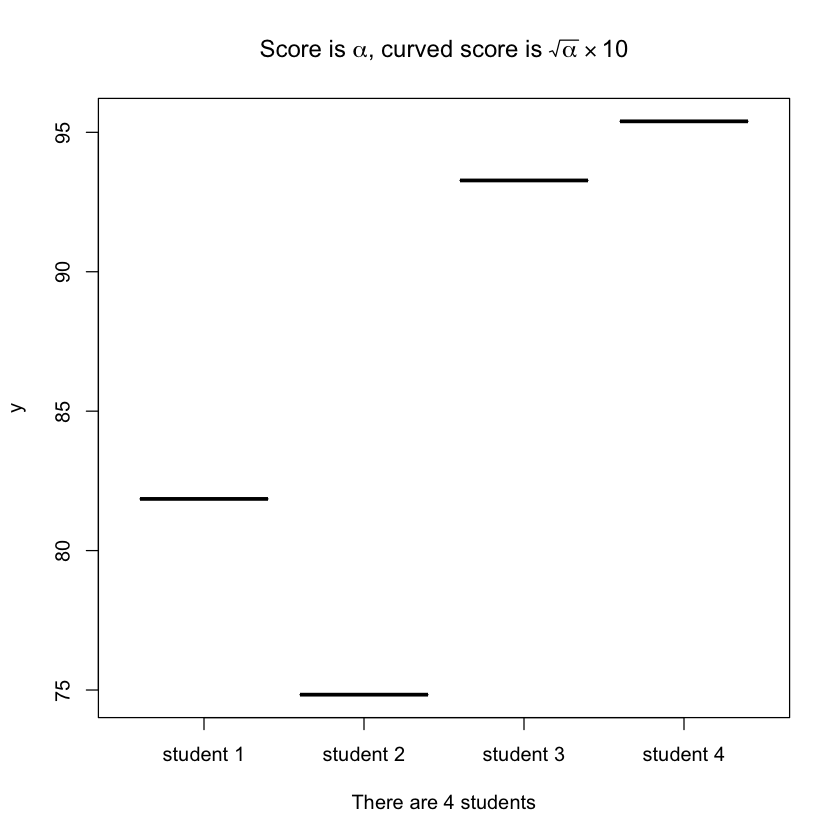

In [46]:
n <- nrow(df)
plot(as.factor(df$student.no), df$curved,
     # Math symbols in text
     main = expression(paste("Score is ", alpha, ", curved score is ", sqrt(alpha)%*%10)),
     # Variable value in text
     xlab = paste("There are", n, "students"))

### 4.4.3 <tt>apply</tt> family functions
Some say that apply( ) family functions distinguish R experts and newbies.

Again, much more in my workshop https://github.com/ly129/MiCM.
#### apply( )

In [47]:
df.scores <- df[, c("score", "curved")]; df.scores

score,curved
<dbl>,<dbl>
67,81.85353
56,74.83315
87,93.27379
91,95.39392


In [48]:
apply(df.scores, MARGIN = 2, FUN = mean)

score  curved 
75.2500 86.3386

In [49]:
apply(df.scores, MARGIN = 1, FUN = diff)   # diff() calculates the difference - see Section 4.4.4

[1] 14.853528 18.833148  6.273791  4.393920

In [50]:
myarray <- array(1:12, dim = c(2,3,2)); print(myarray)

, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12



In [51]:
apply(myarray, MARGIN = c(2, 3), sum)

3,15
7,19
11,23


#### sapply( )

In [52]:
df

names,score,curved,pass,student.no
<fct>,<dbl>,<dbl>,<lgl>,<chr>
Lucy,67,81.85353,TRUE,student 1
John,56,74.83315,FALSE,student 2
Mark,87,93.27379,TRUE,student 3
Candy,91,95.39392,TRUE,student 4


In [53]:
sapply(df, is.numeric)

names      score     curved       pass student.no 
     FALSE       TRUE       TRUE      FALSE      FALSE

###### There is also lapply( ), tapply( ), etc...
###### And their parallel versions mclapply( ), parLapply( ) in the 'parallel' package for parallel computing.

### 4.4.4 Other useful functions

In [54]:
age=c(1,6,4,5,8,5,4,3)
weight=c(45,65,34)
age

[1] 1 6 4 5 8 5 4 3

In [55]:
mean(age)

[1] 4.5

In [56]:
prod(age)

[1] 57600

In [57]:
median(age)

[1] 4.5

In [58]:
var(age)
sd(age)

[1] 4.285714

[1] 2.070197

In [59]:
max(age)
min(age)
range(age)

[1] 8

[1] 1

[1] 1 8

In [60]:
which.max(age)   #returns the index of the greatest element of x
which.min(age)   #returns the index of the smallest element of x

[1] 5

[1] 1

In [61]:
seq(from = 0, to = 1, by = 0.25)
quantile(1:100, probs = seq(from = 0, to = 1, by = 0.25))
# Returns the specified quantiles.

[1] 0.00 0.25 0.50 0.75 1.00

0%    25%    50%    75%   100% 
  1.00  25.75  50.50  75.25 100.00

In [62]:
age
unique(age)   # Gives the vector of distinct values

[1] 1 6 4 5 8 5 4 3

[1] 1 6 4 5 8 3

In [63]:
diff(age)   # Replaces a vector by the vector of first differences

[1]  5 -2  1  3 -3 -1 -1

In [64]:
sort(age, decreasing = F)   # Sorts elements into order

[1] 1 3 4 4 5 5 6 8

In [65]:
order(age)
age[order(age)]   # x[order(x)] orders elements of x

[1] 1 8 3 7 4 6 2 5

[1] 1 3 4 4 5 5 6 8

In [66]:
age
cumsum(age)    # Cumulative sums
cumprod(age)   # Cumulative products

[1] 1 6 4 5 8 5 4 3

[1]  1  7 11 16 24 29 33 36

[1]     1     6    24   120   960  4800 19200 57600

In [67]:
cat <- cut(age, breaks = c(-Inf, 2.5, 5.5, Inf))  # Divide continuous variable in factor with n levels
cbind(age, cat)
table(cat)

age,cat
1,1
6,3
4,2
5,2
8,3
5,2
4,2
3,2


cat
(-Inf,2.5]  (2.5,5.5] (5.5, Inf] 
         1          5          2 

In [68]:
# Split the variable into categories
age.cat <- split(age, cat)
age.cat

$`(-Inf,2.5]`
[1] 1

$`(2.5,5.5]`
[1] 4 5 5 4 3

$`(5.5, Inf]`
[1] 6 8

In [69]:
# split() gives a list
str(age.cat)

List of 3
 $ (-Inf,2.5]: num 1
 $ (2.5,5.5] : num [1:5] 4 5 5 4 3
 $ (5.5, Inf]: num [1:2] 6 8


In [70]:
# lapply: list apply
lapply(age.cat, mean)

$`(-Inf,2.5]`
[1] 1

$`(2.5,5.5]`
[1] 4.2

$`(5.5, Inf]`
[1] 7

## 4.5 Write our own functions
- function( )

In [71]:
# The structure

func_name <- function(argument) {
    statement
}

#### Write my own function of $x^y$:

In [72]:
X.to.the.power.of.Y <- function(y, x){
    x^y
}
X.to.the.power.of.Y(x = 3, y = 2)
X.to.the.power.of.Y(3, 2)     # Following a question in class, note the difference.

[1] 9

[1] 8

###### Uses:
- If we need to do some operation a lot later.
- Work with apply( ) family.
    - The 'FUN' argument in apply( ) family functions only take the name of the functions only.
    - No arguments, operators or combinations of these allowed.

###### Example: calculate the square of the score

In [73]:
df.scores

score,curved
<dbl>,<dbl>
67,81.85353
56,74.83315
87,93.27379
91,95.39392


In [74]:
# The following code does not work
# apply(df.scores, MARGIN = 2, FUN = ^2)

In [75]:
# Instead we can do
my.fun <- function(x){x^2}
apply(df.scores, MARGIN = 2, FUN = my.fun)

score,curved
4489,6700
3136,5600
7569,8700
8281,9100


###### Exercise: write our own function to calculate x %% y and x %/% y.

- Note how to return the output in function( ) and assess the results correspondingly.

In [76]:
# Two inputs, y and x, so two arguments

# Option 1 - use %% and %/% operators
modulus1 <- function(y, x){
    mod <- y %% x
    int.div <- y %/% x
    return(list(modulus=mod, integer.division=int.div))
}
out1 <- modulus1(y = 9, x = 2)
# print(out1)
out1
str(out1)

$modulus
[1] 1

$integer.division
[1] 4

List of 2
 $ modulus         : num 1
 $ integer.division: num 4


In [77]:
out1$modulus
# out1$integer.division

[1] 1

In [78]:
out1$integer.division

[1] 4

In [79]:
# Option 2 - use trunc() or floor()

modulus2 <- function(y, x){
    mod <- trunc(y/x)     # or floor(y/x)
    int.div <- y - x * mod
    return(c(modulus=mod, integer.division=int.div))
}
out2 <- modulus2(9, 2)
print(out2)
str(out2)

         modulus integer.division 
               4                1 
 Named num [1:2] 4 1
 - attr(*, "names")= chr [1:2] "modulus" "integer.division"


In [80]:
out2[1]
out2[2]

modulus 
      4

integer.division 
               1

In [81]:
out2["modulus"]

modulus 
      4

In [82]:
attr(out2, "names")

[1] "modulus"          "integer.division"

In [83]:
# Option 3 - use loops

modulus3 <- function(y, x){
    i <- 0
    while (y>=x){
        y <- y - x
        i <- i + 1
    }
    return(cat("modulus=", y, ", Integer division=", i)) # modulus
}

# I want modulus(y, x) to give me 'y mod x' for any integers y and x.
out3 <- modulus3(9, 2)

# Note that without printing out3, the result is already shown.

modulus= 1 , Integer division= 4

In [84]:
9%%2

[1] 1

In [85]:
9%/%2

[1] 4